In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('Adjusted_Dataset.csv')

In [4]:
df.head()

,Rental_Yield (%),Appreciation_Rate (%),Crime_Rate (per 100k),Market_Availability (Establishments),AQI,Public_Transport_Access (Score),School_Ratings (Out of 5),Walkability_Score (Out of 100),Location,Transaction_Date,Property_Age (Years),House_Size (sq ft),Price_per_sq_ft ($),Total_House_Price ($)
0,7.950936,4.639605,116.659983,75,206,84.186380,5.000000,138.439824,Miami,2022-08-11,84,8349.418046,519.621649,4338538.37
1,7.828601,2.023236,301.872656,177,346,52.868475,3.761795,90.486429,Boston,2006-10-19,64,1184.457185,118.180008,139979.16
2,8.245631,0.141944,1036.731341,96,491,70.971784,2.451753,59.358219,Dallas,2005-10-01,88,5764.199248,257.691993,1485387.99
3,5.813578,5.501579,90.240371,139,210,42.639838,3.951985,85.279676,Boston,2023-05-30,77,764.397097,332.927926,254489.14
4,3.467963,4.388035,260.893747,109,427,42.464859,5.000000,84.929718,Houston,2014-12-12,41,2291.922796,410.416630,940643.23


In [5]:
import json 
columns= {
        'data Columns' : [col.lower() for col in df['Location'].unique().tolist()],
}

with open('columns.json' , 'w') as f:
    json.dump(columns, f, indent=4)
    

In [6]:
df.groupby('Location')['Location'].agg('count').sort_values(ascending=False)

Location
New York City    1053
Seattle          1032
Houston          1019
San Francisco    1014
Miami            1000
Dallas            992
Boston            988
Los Angeles       978
Denver            972
Chicago           952
Name: Location, dtype: int64

In [7]:
# Create dummy variables for Location column with int values (0 or 1)
location_dummies = pd.get_dummies(df['Location']).astype(int)

# Concatenate the dummy variables with the original dataframe
df2 = pd.concat([df, location_dummies], axis=1)

# Drop the original Location column
df2 = df2.drop('Location', axis=1)

# Show the first few rows of the encoded dataframe
print("Shape of encoded dataframe:", df2.shape)
df2.head()

Shape of encoded dataframe: (10000, 23)


,Rental_Yield (%),Appreciation_Rate (%),Crime_Rate (per 100k),Market_Availability (Establishments),AQI,Public_Transport_Access (Score),School_Ratings (Out of 5),Walkability_Score (Out of 100),Transaction_Date,Property_Age (Years),...,Boston,Chicago,Dallas,Denver,Houston,Los Angeles,Miami,New York City,San Francisco,Seattle
0,7.950936,4.639605,116.659983,75,206,84.186380,5.000000,138.439824,2022-08-11,84,...,0,0,0,0,0,0,1,0,0,0
1,7.828601,2.023236,301.872656,177,346,52.868475,3.761795,90.486429,2006-10-19,64,...,1,0,0,0,0,0,0,0,0,0
2,8.245631,0.141944,1036.731341,96,491,70.971784,2.451753,59.358219,2005-10-01,88,...,0,0,1,0,0,0,0,0,0,0
3,5.813578,5.501579,90.240371,139,210,42.639838,3.951985,85.279676,2023-05-30,77,...,1,0,0,0,0,0,0,0,0,0
4,3.467963,4.388035,260.893747,109,427,42.464859,5.000000,84.929718,2014-12-12,41,...,0,0,0,0,1,0,0,0,0,0


In [8]:
df2.Transaction_Date= df2.Transaction_Date.apply(lambda x: x.split('-')[0])

In [9]:
df2.head()

,Rental_Yield (%),Appreciation_Rate (%),Crime_Rate (per 100k),Market_Availability (Establishments),AQI,Public_Transport_Access (Score),School_Ratings (Out of 5),Walkability_Score (Out of 100),Transaction_Date,Property_Age (Years),...,Boston,Chicago,Dallas,Denver,Houston,Los Angeles,Miami,New York City,San Francisco,Seattle
0,7.950936,4.639605,116.659983,75,206,84.186380,5.000000,138.439824,2022,84,...,0,0,0,0,0,0,1,0,0,0
1,7.828601,2.023236,301.872656,177,346,52.868475,3.761795,90.486429,2006,64,...,1,0,0,0,0,0,0,0,0,0
2,8.245631,0.141944,1036.731341,96,491,70.971784,2.451753,59.358219,2005,88,...,0,0,1,0,0,0,0,0,0,0
3,5.813578,5.501579,90.240371,139,210,42.639838,3.951985,85.279676,2023,77,...,1,0,0,0,0,0,0,0,0,0
4,3.467963,4.388035,260.893747,109,427,42.464859,5.000000,84.929718,2014,41,...,0,0,0,0,1,0,0,0,0,0


In [10]:
df2.columns

Index(['Rental_Yield (%)', 'Appreciation_Rate (%)', 'Crime_Rate (per 100k)',
       'Market_Availability (Establishments)', 'AQI',
       'Public_Transport_Access (Score)', 'School_Ratings (Out of 5)',
       'Walkability_Score (Out of 100)', 'Transaction_Date',
       'Property_Age (Years)', 'House_Size (sq ft)', 'Price_per_sq_ft ($)',
       'Total_House_Price ($)', 'Boston', 'Chicago', 'Dallas', 'Denver',
       'Houston', 'Los Angeles', 'Miami', 'New York City', 'San Francisco',
       'Seattle'],
      dtype='object')

In [11]:
df.groupby('Market_Availability (Establishments)')['Market_Availability (Establishments)'].agg('count').sort_values(ascending=False)

Market_Availability (Establishments)
190    73
123    68
14     67
77     66
191    65
       ..
39     37
168    37
169    37
151    35
105    34
Name: Market_Availability (Establishments), Length: 195, dtype: int64

In [12]:
df3=df2.drop(['House_Size (sq ft)'], axis=1)

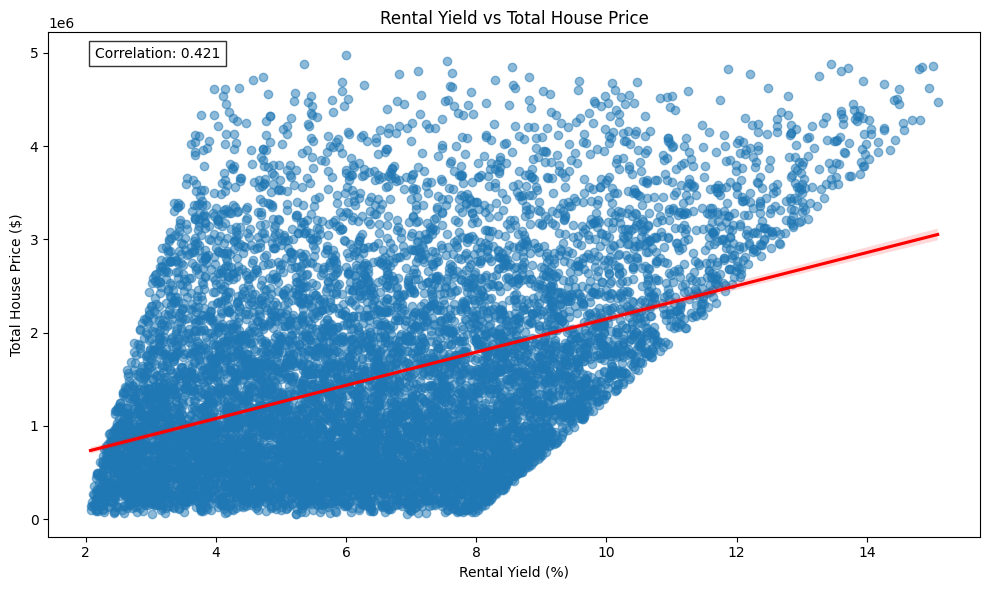


Correlation Analysis:
Correlation coefficient: 0.421

Interpretation:
✓ Moderate correlation


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create figure
plt.figure(figsize=(10, 6))

# Create scatter plot with regression line
sns.regplot(data=df2, 
            x='Rental_Yield (%)', 
            y='Total_House_Price ($)',
            scatter_kws={'alpha':0.5},
            line_kws={'color': 'red'})

# Calculate correlation
correlation = df2['Rental_Yield (%)'].corr(df2['Total_House_Price ($)'])

# Customize plot
plt.title('Rental Yield vs Total House Price', fontsize=12)
plt.xlabel('Rental Yield (%)')
plt.ylabel('Total House Price ($)')

# Add correlation text
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Print statistical analysis
print("\nCorrelation Analysis:")
print(f"Correlation coefficient: {correlation:.3f}")
print("\nInterpretation:")
if abs(correlation) > 0.7:
    print("✓ Strong correlation")
elif abs(correlation) > 0.3:
    print("✓ Moderate correlation")
else:
    print("✓ Weak correlation")

Model Creation

In [14]:
X= df3.drop(['Total_House_Price ($)' ,'Price_per_sq_ft ($)','Market_Availability (Establishments)','Transaction_Date','Property_Age (Years)'], axis=1)
y= df3['Total_House_Price ($)']

In [15]:
X.columns

Index(['Rental_Yield (%)', 'Appreciation_Rate (%)', 'Crime_Rate (per 100k)',
       'AQI', 'Public_Transport_Access (Score)', 'School_Ratings (Out of 5)',
       'Walkability_Score (Out of 100)', 'Boston', 'Chicago', 'Dallas',
       'Denver', 'Houston', 'Los Angeles', 'Miami', 'New York City',
       'San Francisco', 'Seattle'],
      dtype='object')

In [16]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Print the shapes of resulting datasets
print("Training set shape:")
print(f"x_train: {x_train.shape}")
print(f"y_train: {y_train.shape}")
print("\nTesting set shape:")
print(f"x_test: {x_test.shape}")
print(f"y_test: {y_test.shape}")

Training set shape:
x_train: (8000, 17)
y_train: (8000,)

Testing set shape:
x_test: (2000, 17)
y_test: (2000,)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import time

# Define models and hyperparameter grids
models = {
    "RandomForest": {
        "model": RandomForestRegressor(),
        "params": {
            "n_estimators": [10, 50, 100],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4]
        }
    },
    "DecisionTree": {
        "model": DecisionTreeRegressor(),
        "params": {
            "max_depth": [None, 5, 10, 20],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4]
        }
    },
    "LinearRegression": {
        "model": LinearRegression(),
        "params": {}  # No hyperparameters for Linear Regression
    }
}

# Dictionary to store results
best_models = {}

# Train and evaluate each model
for name, config in models.items():
    print(f"\nTraining {name}...")
    start_time = time.time()
    
    # Setup GridSearchCV
    grid_search = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        cv=5,
        scoring='neg_mean_squared_error',
        verbose=1,
        n_jobs=-1
    )
    
    # Fit the model
    grid_search.fit(x_train, y_train)
    
    # Make predictions
    y_pred = grid_search.best_estimator_.predict(x_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    training_time = time.time() - start_time
    
    # Calculate accuracy (percentage of predictions within 10% of actual values)
    accuracy = np.mean(np.abs((y_test - y_pred) / y_test) <= 0.10) * 100
    
    # Store results
    best_models[name] = {
        'model': grid_search.best_estimator_,
        'best_params': grid_search.best_params_,
        'rmse': np.sqrt(mse),
        'r2': r2,
        'accuracy': accuracy,
        'training_time': training_time
    }

# Print results for all models
print("\n=== Model Comparison ===")
for name, results in best_models.items():
    print(f"\n{name}:")
    print(f"Best Parameters: {results['best_params']}")
    print(f"RMSE: {results['rmse']:,.2f}")
    print(f"R² Score: {results['r2']:.3f}")
    print(f"Training Time: {results['training_time']:.2f} seconds")
    
    # Add performance category
    if results['r2'] > 0.6:
        print("Performance Category: Strong")
    elif results['r2'] > 0.4:
        print("Performance Category: Moderate")
    else:
        print("Performance Category: Weak")



Training RandomForest...
Fitting 5 folds for each of 81 candidates, totalling 405 fits



=== Random Forest Model Performance ===
RMSE: 593,064.40
R² Score: 0.663
Training Time: 22.77 seconds

Performance Category:
Moderate (R² > 0.4)


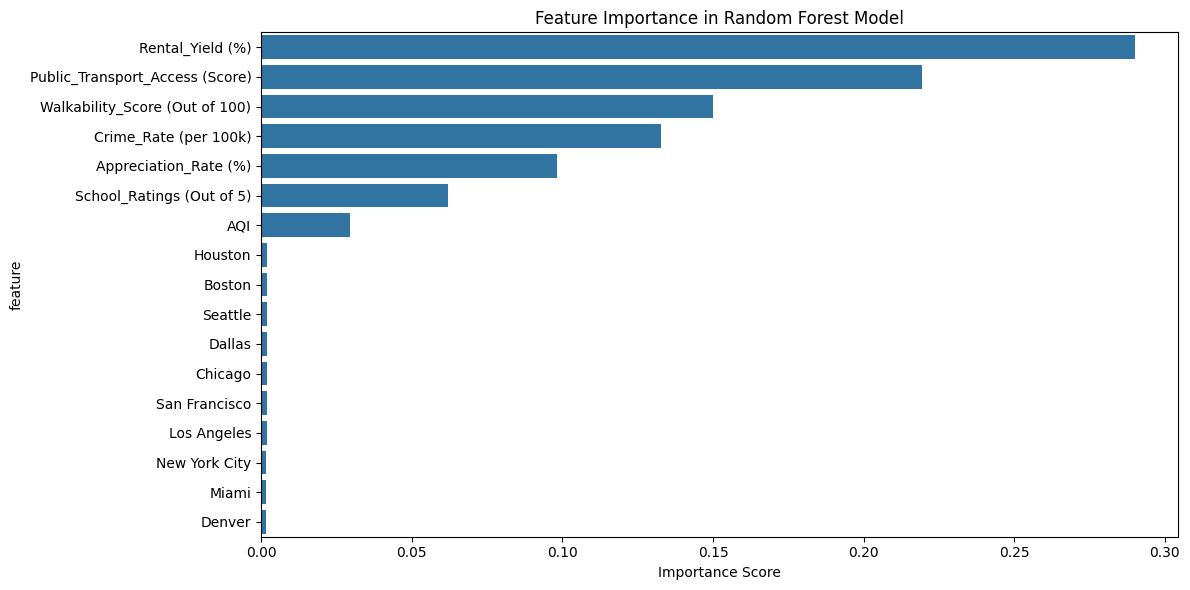


Top 5 Most Important Features:
                        feature  importance
               Rental_Yield (%)    0.289921
Public_Transport_Access (Score)    0.219494
 Walkability_Score (Out of 100)    0.149958
          Crime_Rate (per 100k)    0.132849
          Appreciation_Rate (%)    0.098266


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd


rf_model = RandomForestRegressor(
    n_estimators=500,          
    max_depth=20,              
    min_samples_split=5,       
    min_samples_leaf=2,        
    random_state=42            
)

# Train the model
start_time = time.time()
rf_model.fit(x_train, y_train)
training_time = time.time() - start_time

# Make predictions
y_pred = rf_model.predict(x_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


# Print model performance
print("\n=== Random Forest Model Performance ===")
print(f"RMSE: {rmse:,.2f}")
print(f"R² Score: {r2:.3f}")
print(f"Training Time: {training_time:.2f} seconds")

# Performance categorization
print("\nPerformance Category:")
if r2 > 0.9:
    print("Excellent (R² > 0.8)")
elif r2 > 0.7:
    print("Good (R² > 0.6)")
elif r2 > 0.5:
    print("Moderate (R² > 0.4)")
else:
    print("Poor (R² ≤ 0.3)")

# Feature importance analysis
feature_importance = pd.DataFrame({
    'feature': x_train.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

# Print top 5 most important features
print("\nTop 5 Most Important Features:")
print(feature_importance.head().to_string(index=False))

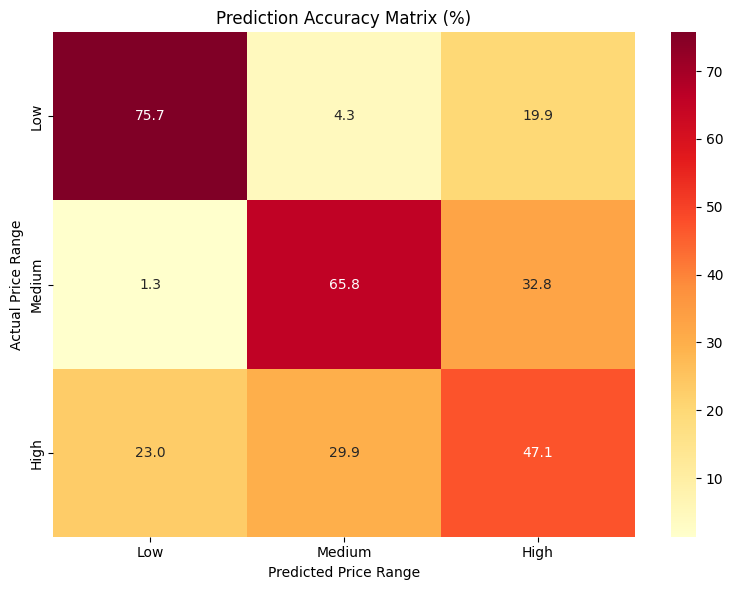


Prediction Accuracy by Price Range:
Low Price Range: 75.7% correct predictions
Medium Price Range: 65.8% correct predictions
High Price Range: 47.1% correct predictions

Overall Classification Accuracy: 62.9%


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd

# Create bins for actual and predicted values
def create_price_categories(prices):
    return pd.qcut(prices, q=3, labels=['Low', 'Medium', 'High'])

# Categorize actual and predicted values
y_test_cat = create_price_categories(y_test)
y_pred_cat = create_price_categories(y_pred)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test_cat, y_pred_cat)

# Calculate percentages
conf_matrix_percent = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percent, 
            annot=True, 
            fmt='.1f', 
            cmap='YlOrRd',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])

plt.title('Prediction Accuracy Matrix (%)')
plt.xlabel('Predicted Price Range')
plt.ylabel('Actual Price Range')
plt.tight_layout()
plt.show()

# Print classification report
print("\nPrediction Accuracy by Price Range:")
for i, category in enumerate(['Low', 'Medium', 'High']):
    accuracy = conf_matrix_percent[i][i]
    print(f"{category} Price Range: {accuracy:.1f}% correct predictions")

# Overall accuracy
print(f"\nOverall Classification Accuracy: {np.trace(conf_matrix_percent)/3:.1f}%")


In [25]:
def predict_property_price(model, rental_yield, appreciation_rate, crime_rate, aqi, 
                         transport_score, school_rating, walkability, city):
    
  
    cities = {
        'Boston': 0, 'Chicago': 0, 'Dallas': 0, 'Denver': 0, 
        'Houston': 0, 'Los Angeles': 0, 'Miami': 0, 'New York City': 0,
        'San Francisco': 0, 'Seattle': 0
    }

    if city in cities:
        cities[city] = 1
    
   
    input_data = np.array([[
        rental_yield,
        appreciation_rate,
        crime_rate,
        aqi,
        transport_score,
        school_rating,
        walkability,
        *cities.values()  # Unpack city values
    ]])
    
    # Make prediction
    prediction = model.predict(input_data)
    
    return prediction[0]



In [26]:
# Example usage:
price = predict_property_price(
    model=rf_model,  
    rental_yield=5.5,
    appreciation_rate=3.2,
    crime_rate=450,
    aqi=65,
    transport_score=7.5,
    school_rating=4.2,
    walkability=85,
    city='San Francisco'
)

print(f"Predicted Property Price: ${price:,.2f}")

Predicted Property Price: $440,794.60


/Users/rishetmehra/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [27]:
import pickle

# Save the model to a file
with open('house_price_model.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)

# Save the feature names (columns) for future reference
with open('model_features.pkl', 'wb') as features_file:
    pickle.dump(X.columns.tolist(), features_file)

print("Model and features saved successfully!")

Model and features saved successfully!


In [29]:
# Load the model and features
with open('house_price_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)
with open('model_features.pkl', 'rb') as features_file:
    loaded_features = pickle.load(features_file)
print("Model and features loaded successfully!")
# Example usage of loaded model
price = predict_property_price(
    model=loaded_model,  
    rental_yield=5.5,
    appreciation_rate=3.2,
    crime_rate=450,
    aqi=65,
    transport_score=7.5,
    school_rating=4.2,
    walkability=85,
    city='San Francisco'
)
print(f"Predicted Property Price: ${price:,.2f}")


Model and features loaded successfully!
Predicted Property Price: $440,794.60


/Users/rishetmehra/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
import pickle 
with open('model_features.pkl', 'rb') as features_file:
    feature_names = pickle.load(features_file)
    



In [ ]:
print(feature_names)

['Rental_Yield (%)', 'Appreciation_Rate (%)', 'Crime_Rate (per 100k)', 'AQI', 'Public_Transport_Access (Score)', 'School_Ratings (Out of 5)', 'Walkability_Score (Out of 100)', 'Boston', 'Chicago', 'Dallas', 'Denver', 'Houston', 'Los Angeles', 'Miami', 'New York City', 'San Francisco', 'Seattle']
